### Music recommendation System

In [55]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import sparse
import random
import lightfm 
from lightfm import LightFM, cross_validation
from lightfm.evaluation import precision_at_k, auc_score
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")
import ast
from scipy.spatial.distance import cosine, euclidean, hamming
from sklearn.preprocessing import normalize
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from time import time
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

 ## Read the data

In [56]:
data = pd.read_csv("../input/spotify-dataset/data/data.csv")
genre_data = pd.read_csv('../input/spotify-dataset/data/data_by_genres.csv')
year_data = pd.read_csv('../input/spotify-dataset/data/data_by_year.csv')
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [57]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [58]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [59]:
print(year_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


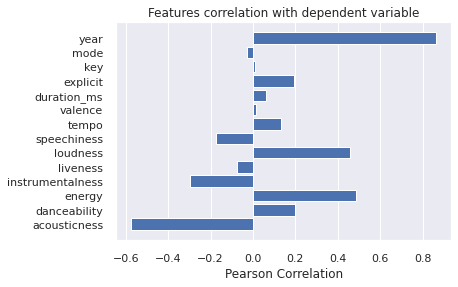

In [60]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)   
visualizer.show()

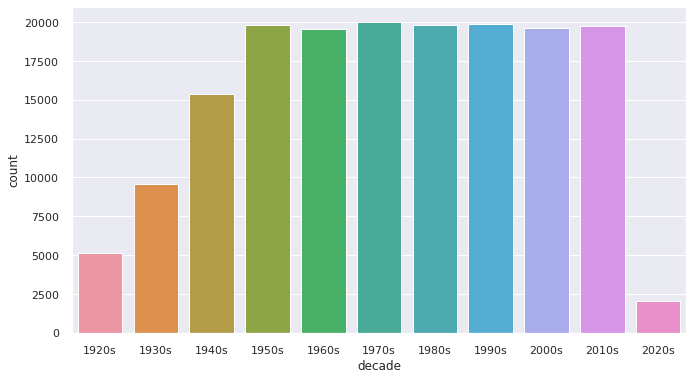

In [61]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [62]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [63]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [64]:
data['artists'] = data['artists'].map(lambda x: x.lstrip('[').rstrip(']'))
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
0,0.0594,1921,0.982,"'Sergei Rachmaninoff', 'James Levine', 'Berlin...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920s
1,0.9630,1921,0.732,'Dennis Day',0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1920s
2,0.0394,1921,0.961,'KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1920s
3,0.1650,1921,0.967,'Frank Parker',0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1920s
4,0.2530,1921,0.957,'Phil Regan',0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1920s


In [65]:
data['artists'] = data['artists'].map(lambda x: x[1:-1])
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
0,0.0594,1921,0.982,"Sergei Rachmaninoff', 'James Levine', 'Berline...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920s
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1920s
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1920s
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1920s
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1920s


In [66]:
p = 0.02
df_playlist = pd.read_csv('/kaggle/input/spotify-playlists/spotify_dataset.csv', error_bad_lines=False, warn_bad_lines=False, skiprows=lambda i: i>0 and random.random() > p)
df_playlist.head()

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,The Len Price 3,Keep Your Eyes On Me,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Oasis,Little By Little,IOW 2012
2,07f0fc3be95dcd878966b1f9572ff670,2080,Maximized,2080
3,07f0fc3be95dcd878966b1f9572ff670,C418,Minecraft,C418
4,07f0fc3be95dcd878966b1f9572ff670,Pretty Lights,Let The World Hurry By,Chill out


In [67]:
df_playlist.columns = df_playlist.columns.str.replace('"', '')
df_playlist.columns = df_playlist.columns.str.replace('name', '')
df_playlist.columns = df_playlist.columns.str.replace(' ', '')
df_playlist.columns

Index(['user_id', 'artist', 'track', 'playlist'], dtype='object')

In [68]:
df_playlist = df_playlist.groupby('artist').filter(lambda x : len(x)>=30)

In [69]:
df_playlist = df_playlist[df_playlist.groupby('user_id').artist.transform('nunique') >= 10]

In [70]:
size = lambda x: len(x)
df_freq = df_playlist.groupby(['user_id', 'artist']).agg('size').reset_index().rename(columns={0:'freq'})[['user_id', 'artist', 'freq']].sort_values(['freq'], ascending=False)
df_freq.head()

,user_id,artist,freq
15798,414050deadb38aafd8d4ad22ca634055,Vitamin String Quartet,57
9542,26b51e580277e131f87e4c7ee4c0887a,Vitamin String Quartet,49
3730,106036f1fc9e3be1f674fb591765fb85,Grateful Dead,45
505,014e695cc6df96011b90a5beb3206012,Ilaiyaraaja,44
60758,fa849dabeb14a2800ad5130907fc5018,Peggy Lee,40


### Create a DF for artists and add artist id


In [71]:
df_artist = pd.DataFrame(df_freq["artist"].unique())
df_artist = df_artist.reset_index()
df_artist = df_artist.rename(columns={'index':'artist_id', 0:'artist'})
df_artist.head()

,artist_id,artist
0,0,Vitamin String Quartet
1,1,Grateful Dead
2,2,Ilaiyaraaja
3,3,Peggy Lee
4,4,Wolfgang Amadeus Mozart


### Get the Information of user

In [72]:
def GetInPut(user):
    inputArtist = pd.DataFrame(user)
    Id = df_artist[df_artist['artist'].isin(inputArtist['artist'].tolist())]
    inputArtist = pd.merge(Id, inputArtist)
    return inputArtist

In [73]:
user = [
            {'artist':'Ella Fitzgerald', 'freq':40},
            {'artist':'Frank Sinatra', 'freq':10},
            {'artist':'Lil Wayne', 'freq':3},
            {'artist':"The Rolling Stones", 'freq':5},
            {'artist':'Louis Armstrong', 'freq':5}
         ] 

In [74]:
inputArtist = GetInPut(user)

## Collaborative Filtering Song Recommendation 


In [75]:
def ColFilter(inputArtist,df_freq):
    Id = df_artist[df_artist['artist'].isin(inputArtist['artist'].tolist())]
    inputArtist = pd.merge(Id, inputArtist)
    df_freq  = pd.merge(df_freq , df_artist, how='inner', on='artist')
    userSubsetGroup = df_freq.groupby(['user_id'])
    userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
    userSubsetGroup = userSubsetGroup[0:100]
    pearsonCorDict = {}
    for name, group in userSubsetGroup:
        group = group.sort_values(by='artist_id')
        inputArtist = inputArtist.sort_values(by='artist_id')
        n = len(group)
        temp = inputArtist[inputArtist['artist_id'].isin(group['artist_id'].tolist())]
        tempRatingList = temp['freq'].tolist()
        tempGroupList = group['freq'].tolist()
        Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(n)
        Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(n)
        Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(n)
        if Sxx != 0 and Syy != 0:
            pearsonCorDict[name] = Sxy/sqrt(Sxx*Syy)
        else:
            pearsonCorDict[name] = 0
    pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
    pearsonDF.columns = ['similarityIndex']
    pearsonDF['user_id'] = pearsonDF.index
    pearsonDF.index = range(len(pearsonDF))
    topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
    topUsersRating=topUsers.merge(df_freq, left_on='user_id', right_on='user_id', how='inner')
    topUsersRatingS=topUsersRating
    topUsersRating['weightedFreq'] = topUsersRating['similarityIndex']*topUsersRating['freq']
    tempTopUsersRating = topUsersRating.groupby('artist_id').sum()[['similarityIndex','weightedFreq']]
    tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedFreq']
    recommendation_df = pd.DataFrame()
    recommendation_df['weighted average freq score'] = tempTopUsersRating['sum_weightedFreq']/tempTopUsersRating['sum_similarityIndex']
    recommendation_df['artist_id'] = tempTopUsersRating.index
    recommendation_df = recommendation_df.sort_values(by='weighted average freq score', ascending=False)
    recommendation_final = df_artist.loc[df_artist['artist_id'].isin(recommendation_df.head(10)['artist_id'].tolist())]
    return recommendation_final,topUsersRatingS

In [76]:
recommendation_final,topUsersRatingS=ColFilter(inputArtist,df_freq)
recommendation_final

,artist_id,artist
1,1,Grateful Dead
3,3,Peggy Lee
5,5,Ella Fitzgerald
6,6,Frank Sinatra
7,7,Louis Armstrong
8,8,Jamey Aebersold Play-A-Long
20,20,Keith Jarrett
25,25,Nat King Cole
64,64,Scooter
67,67,Shinedown


### Results

In [77]:
df_playlist_2  = pd.merge(df_playlist , df_artist, how='inner', on='artist')
df_playlist_2.head()

,user_id,artist,track,playlist,artist_id
0,07f0fc3be95dcd878966b1f9572ff670,Pretty Lights,Let The World Hurry By,Chill out,362
1,7511e45f2cc6f6e609ae46c15506538c,Pretty Lights,Finally Moving,Liked from Radio,362
2,82ad2c0c8ce91eabe4e330077a73d808,Pretty Lights,Reel 3 Break 3 - Live Studio Sessions,Pretty Lights - A Color Map of the Sun (Deluxe...,362
3,99deafd9b792af8e6a535483088faef2,Pretty Lights,Pop Quiz,All Spotify Stuff,362
4,01ad7fc79498ab698b3f0e0f2c5c818e,Pretty Lights,You Get High,Errday,362


# Content based Filtering model

In [78]:
data['song_id']=data.index
df = data[['danceability','energy',"valence","speechiness","instrumentalness","acousticness"]]
df.index = data['song_id']
df_normalized = pd.DataFrame(normalize(df, axis=1))
df_normalized.columns = df.columns
df_normalized.index = df.index
df_normalized.head()

,danceability,energy,valence,speechiness,instrumentalness,acousticness
song_id,,,,,,
0,0.204439,0.154611,0.043526,0.026819,0.643359,0.719566
1,0.526206,0.219092,0.618725,0.266637,0.000000,0.470308
2,0.238274,0.120590,0.028622,0.024627,0.663245,0.698114
3,0.258165,0.290084,0.154899,0.033233,0.000026,0.907802
4,0.382654,0.176680,0.231606,0.034787,0.000002,0.876076


In [79]:
def Content_filter_music_recommender(song_id, N):
    distance_method = cosine
    allSongs = pd.DataFrame(df_normalized.index)
    allSongs = allSongs[allSongs.song_id != song_id]
    allSongs["distance"] = allSongs["song_id"].apply(lambda x: distance_method(df_normalized.loc[song_id], df_normalized.loc[x]))
    TopNRecommendation = allSongs.sort_values(["distance"]).head(N).sort_values(by=['distance', 'song_id'])
    Recommendation = pd.merge(TopNRecommendation , data, how='inner', on='song_id')
    SongName = Recommendation['name']
    return SongName

In [80]:
SongName=Content_filter_music_recommender(4, 5)
SongName

0            Something - Studio Demo
1                     Moonlight Mood
2    Love, You Didn't Do Right By Me
3                       The Luckiest
4          Jagmag Jagmag Karta Nikla
Name: name, dtype: object

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('popularity', axis=1), data['popularity'], test_size = 0.2, random_state = 42)

In [82]:
from yellowbrick.classifier import ClassPredictionError
#classes=['song_id','danceability','','']
visualizer = ClassPredictionError(
    Content_filter_music_recommender, classes=df)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

DatasetsError: the downloaded dataset was improperly packaged without meta.json - please report this bug to the Yellowbrick maintainers!